# view mean squared displacement

In [52]:
import numpy as np
# url https://stackoverflow.com/a/14298647/9475509 [20241117]
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    x = np.array(x)
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

# url https://chatgpt.com/share/6739cd9f-77a0-800a-8c44-f2587ee0a86f [20241117]
def autocorrelation(sequence, max_lag):
    """Compute autocorrelation for a given sequence up to max_lag."""
    n = len(sequence)
    mean = np.mean(sequence)
    var = np.var(sequence)
    autocorr = [np.correlate(sequence[:n-lag] - mean, sequence[lag:] - mean)[0] / (var * (n - lag)) for lag in range(max_lag)]
    return autocorr


0.30245633537849803


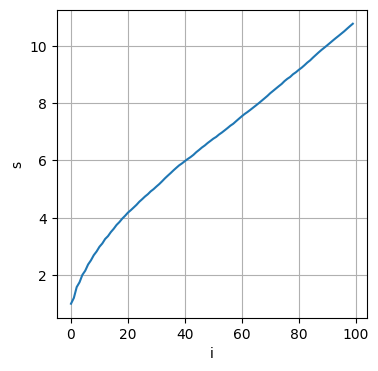

In [152]:
import ipynb.fs.full.walk as walk
import matplotlib.pyplot as plt

N = 100; ndir = 4; rep = 10000
dirs = walk.discrete_dirs(ndir, N)

ac1 = estimated_autocorrelation(dirs)
ac2 = autocorrelation(dirs, N)

print(max(ac1[1:N//2]))

msd = walk.msd_shuffle_dirs(dirs, rep)

plt.figure(figsize=(4,4))
plt.plot(msd, '-')
plt.xlabel('i'); plt.ylabel('s')
plt.grid(); plt.show()
plt.show()